# Moving Average Crossover Strategy
 Concept: Buy when a short-term moving average (e.g., 10-day MA) crosses above a long-term moving average (e.g., 50-day MA), and sell when it crosses below.

* Type: Trend-following

* Assets: Stocks, ETFs, crypto

* Pros: Simple, widely used

* Cons: Can produce whipsaws in sideways markets



# Imports

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import yfinance as yf

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
df_aapl = yf.download('AAPL', start='2020-01-01')
df_aapl.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200


In [39]:
df_aapl['SMA50'] = df_aapl['Close'].rolling(window=50).mean()
df_aapl['SMA200'] = df_aapl['Close'].rolling(window=200).mean()

In [40]:
df_aapl.head()

Price,Close,High,Low,Open,Volume,SMA50,SMA200
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400,NaN,NaN
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800,NaN,NaN
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200,NaN,NaN
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000,NaN,NaN
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200,NaN,NaN


<Axes: title={'center': 'Moving'}, xlabel='Date'>

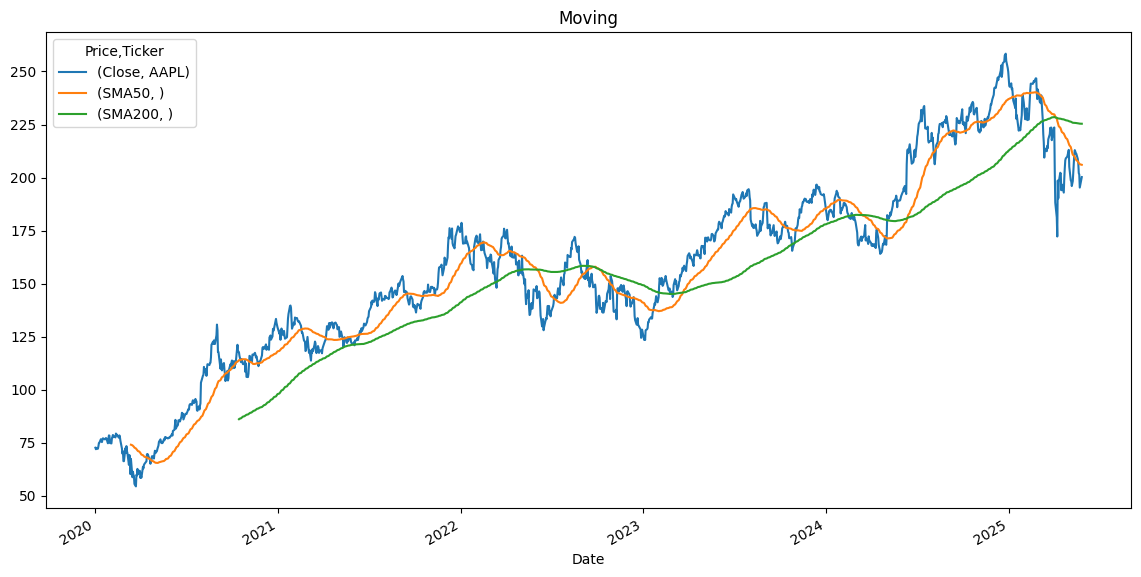

In [41]:
df_aapl[['Close','SMA50','SMA200']].plot(figsize=(14,7), title='Moving')

In [42]:
df_aapl['Signal'] = (df_aapl['SMA50'] > df_aapl['SMA200']) * 1
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,
Date,,,,,,,,
2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400,NaN,NaN,0
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800,NaN,NaN,0
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200,NaN,NaN,0
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000,NaN,NaN,0
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200,NaN,NaN,0
...,...,...,...,...,...,...,...,...
2025-05-20,206.860001,208.470001,205.029999,207.669998,42496600,207.222529,225.576006,0
2025-05-21,202.089996,207.039993,200.710007,205.169998,59211800,206.853313,225.492273,0


In [43]:
df_aapl['Position'] = df_aapl['Signal'].shift(1)
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
Date,,,,,,,,,
2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400,NaN,NaN,0,NaN
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800,NaN,NaN,0,0.0
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200,NaN,NaN,0,0.0
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000,NaN,NaN,0,0.0
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...
2025-05-20,206.860001,208.470001,205.029999,207.669998,42496600,207.222529,225.576006,0,0.0
2025-05-21,202.089996,207.039993,200.710007,205.169998,59211800,206.853313,225.492273,0,0.0


In [44]:
df_aapl['Daily_Ret'] = df_aapl['Close'].pct_change()
df_aapl['Strategy_Ret'] = df_aapl['Position'] * df_aapl['Daily_Ret']
df_aapl

Price,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily_Ret,Strategy_Ret
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,,
Date,,,,,,,,,,,
2020-01-02,72.620827,72.681274,71.373203,71.627077,135480400,NaN,NaN,0,NaN,NaN,NaN
2020-01-03,71.914818,72.676447,71.689957,71.847118,146322800,NaN,NaN,0,0.0,-0.009722,-0.0
2020-01-06,72.487839,72.526526,70.783241,71.034702,118387200,NaN,NaN,0,0.0,0.007968,0.0
2020-01-07,72.146935,72.753816,71.926907,72.497522,108872000,NaN,NaN,0,0.0,-0.004703,-0.0
2020-01-08,73.307526,73.609760,71.849548,71.849548,132079200,NaN,NaN,0,0.0,0.016086,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2025-05-20,206.860001,208.470001,205.029999,207.669998,42496600,207.222529,225.576006,0,0.0,-0.009196,-0.0
2025-05-21,202.089996,207.039993,200.710007,205.169998,59211800,206.853313,225.492273,0,0.0,-0.023059,-0.0


In [58]:
(1 + df_aapl['Daily_Ret']).cumprod()

Date
2020-10-15    0.996039
2020-10-16    0.982094
2020-10-19    0.957010
2020-10-20    0.969635
2020-10-21    0.964354
                ...   
2025-05-20    1.752792
2025-05-21    1.712374
2025-05-22    1.706188
2025-05-23    1.654586
2025-05-27    1.696444
Name: Daily_Ret, Length: 1158, dtype: float64

In [59]:
(1 + df_aapl['Strategy_Ret']).cumprod()

Date
2020-10-15    1.000000
2020-10-16    0.985999
2020-10-19    0.960815
2020-10-20    0.973490
2020-10-21    0.968188
                ...   
2025-05-20    1.059176
2025-05-21    1.059176
2025-05-22    1.059176
2025-05-23    1.059176
2025-05-27    1.059176
Name: Strategy_Ret, Length: 1158, dtype: float64

In [48]:
df_aapl['Signal'].mean()

np.float64(0.6403831982313928)

In [55]:
df_aapl.columns

MultiIndex([(       'Close', 'AAPL'),
            (        'High', 'AAPL'),
            (         'Low', 'AAPL'),
            (        'Open', 'AAPL'),
            (      'Volume', 'AAPL'),
            (       'SMA50',     ''),
            (      'SMA200',     ''),
            (      'Signal',     ''),
            (    'Position',     ''),
            (   'Daily_Ret',     ''),
            ('Strategy_Ret',     '')],
           names=['Price', 'Ticker'])

In [57]:
df_aapl.dropna(subset=[(      'SMA200',     '')], axis=0, inplace=True)